<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-dataset-using-Keras" data-toc-modified-id="Loading-dataset-using-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading dataset using Keras</a></span><ul class="toc-item"><li><span><a href="#Test-Data-Generator" data-toc-modified-id="Test-Data-Generator-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Test Data Generator</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model 1</a></span></li><li><span><a href="#Define-Model-Architecture" data-toc-modified-id="Define-Model-Architecture-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Define Model Architecture</a></span></li><li><span><a href="#Compile-the-model" data-toc-modified-id="Compile-the-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Compile the model</a></span></li><li><span><a href="#Model-Learning" data-toc-modified-id="Model-Learning-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model Learning</a></span></li></ul></li></ul></div>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import imageio
import tensorboard
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils.vis_utils import plot_model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import keras
import numpy
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
import os
os.path.exists('/content/drive/My Drive/BAIProjectData/Model Inputs - compressed - Small - 60_40 split.zip')
!unzip -a '/content/drive/My Drive/BAIProjectData/Model Inputs - compressed - Small - 60_40 split.zip'

Archive:  /content/drive/My Drive/BAIProjectData/Model Inputs - compressed - Small - 60_40 split.zip
   creating: 5. Model Inputs/
  inflating: 5. Model Inputs/.DS_Store  [binary]
   creating: __MACOSX/
   creating: __MACOSX/5. Model Inputs/
  inflating: __MACOSX/5. Model Inputs/._.DS_Store  [binary]
   creating: 5. Model Inputs/test/
   creating: 5. Model Inputs/test/non_defective_bubbles/
  inflating: 5. Model Inputs/test/non_defective_bubbles/nondef_bubbles_14.JPG  [binary]
  inflating: 5. Model Inputs/test/non_defective_bubbles/nondef_bubbles_10.JPG  [binary]
  inflating: 5. Model Inputs/test/non_defective_bubbles/nondef_bubbles_11.JPG  [binary]
  inflating: 5. Model Inputs/test/non_defective_bubbles/nondef_bubbles_13.JPG  [binary]
  inflating: 5. Model Inputs/test/non_defective_bubbles/nondef_bubbles_12.JPG  [binary]
  inflating: 5. Model Inputs/test/non_defective_bubbles/nondef_bubbles_23.JPG  [binary]
  inflating: 5. Model Inputs/test/non_defective_bubbles/nondef_bubbles_3.JPG  

In [0]:
train_ds_location = '/content/5. Model Inputs/train'
test_ds_location = '/content/5. Model Inputs/test'

In [7]:
import os
os.path.exists(train_ds_location)

True

## Loading dataset using Keras

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_gen = ImageDataGenerator(featurewise_center=False,samplewise_center= False,
                               featurewise_std_normalization=False,samplewise_std_normalization = False,
                               rescale = 1./255)

In [0]:
#train_gen.standardize

In [0]:
BATCH_SIZE = 64

In [12]:
train_data = train_gen.flow_from_directory(train_ds_location,
                              target_size = (306,408),
                              color_mode='rgb',
                              batch_size = BATCH_SIZE,
                              class_mode = 'categorical',
                              shuffle = True)

Found 1292 images belonging to 4 classes.


In [13]:
train_data.n

1292

In [14]:
train_data.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [15]:
train_data.class_indices

{'defective_lav': 0,
 'defective_ldl': 1,
 'non_defective': 2,
 'non_defective_bubbles': 3}

In [16]:
pd.Series(train_data.labels).value_counts()

2    561
3    374
1    187
0    170
dtype: int64

In [17]:
train_data.image_shape

(306, 408, 3)

In [0]:
X_batch, y_batch = next(train_data)

In [19]:
# prepare an iterators to scale images
print('Batches train=%d' % (len(train_data)))

Batches train=21


In [20]:
# confirm the scaling works
print('Batch shape=%s, min=%.3f, max=%.3f' % (X_batch.shape, X_batch.min(), X_batch.max()))

Batch shape=(64, 306, 408, 3), min=0.000, max=1.000


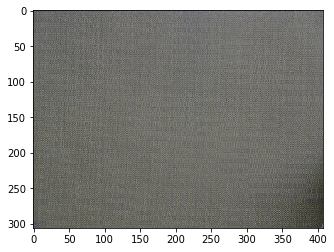

In [21]:

plt.imshow(X_batch[6])

In [22]:
X_batch[6].shape

(306, 408, 3)

In [23]:
print(y_batch[6])

[0. 0. 1. 0.]


In [0]:
import numpy as np

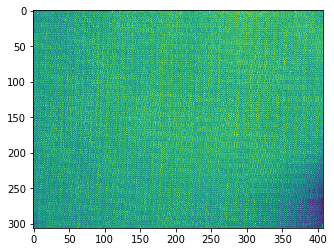

In [25]:
plt.imshow(np.array(X_batch[6])[:,:,0])

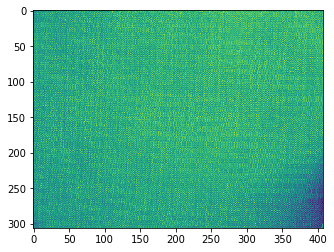

In [26]:
plt.imshow(np.array(X_batch[6])[:,:,1])

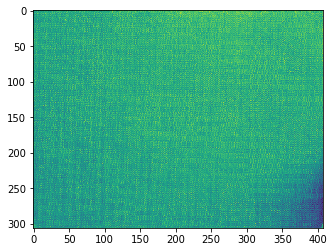

In [27]:
plt.imshow(X_batch[6][:,:,2])

### Test Data Generator

In [0]:
test_gen = ImageDataGenerator(featurewise_center=False,samplewise_center= False,
                              featurewise_std_normalization=False,samplewise_std_normalization = False,
                              rescale = 1./255)

In [0]:
#test_gen.standardize

In [30]:
test_data = test_gen.flow_from_directory(test_ds_location,
                              target_size = (306,408),
                              color_mode='rgb',
                              batch_size = BATCH_SIZE,
                              class_mode = 'categorical',
                              shuffle=True)

Found 51 images belonging to 4 classes.


In [31]:
# prepare an iterators to scale images
print('Batches test=%d' % (len(test_data)))

Batches test=1


In [32]:
test_data.n


51

In [33]:
test_data.class_indices

{'defective_lav': 0,
 'defective_ldl': 1,
 'non_defective': 2,
 'non_defective_bubbles': 3}

In [34]:
pd.Series(test_data.labels).value_counts()

2    23
3    15
1     7
0     6
dtype: int64

In [35]:
test_data.image_shape

(306, 408, 3)

### Model 1

In [0]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout
from keras import initializers
from keras.layers import BatchNormalization

### Define Model Architecture

### Compile the model

In [0]:
model_v1 = Sequential()
model_v1.add(BatchNormalization(input_shape= train_data.image_shape))
KERNEL_SIZE = (3,3)
# Layer 1
model_v1.add(Conv2D(filters = 8,
                    kernel_size = KERNEL_SIZE,
#                    strides = (1,1),
                    padding = 'same',
                    input_shape = train_data.image_shape))
model_v1.add(BatchNormalization())
model_v1.add(Activation('relu'))
model_v1.add(MaxPool2D(pool_size=(2,2)))
model_v1.add(Dropout(0.1))


# Layer 2
model_v1.add(Conv2D(filters = 16,
                    kernel_size = KERNEL_SIZE,
#                    strides = (1,1),
                    padding = 'same'))
model_v1.add(BatchNormalization())
model_v1.add(Activation('relu'))
model_v1.add(MaxPool2D(pool_size=(2,2)))
model_v1.add(Dropout(0.1))

# Layer 3
model_v1.add(Conv2D(filters = 32,
                    kernel_size = KERNEL_SIZE))
#                    strides = (1,1),
#                    padding = 'valid'))
model_v1.add(BatchNormalization())
model_v1.add(Activation('relu'))
model_v1.add(MaxPool2D(pool_size=(2,2)))
model_v1.add(Dropout(0.1))

# Layer 4
model_v1.add(Conv2D(filters = 64,
                    kernel_size = KERNEL_SIZE))
#                    strides = (1,1),
#                    padding = 'valid'))
model_v1.add(BatchNormalization())
model_v1.add(Activation('relu'))
model_v1.add(MaxPool2D(pool_size=(2,2)))
model_v1.add(Dropout(0.1))


# Layer 4a
model_v1.add(Conv2D(filters = 128,
                    kernel_size = KERNEL_SIZE))
#                    strides = (1,1),
#                    padding = 'valid'))
model_v1.add(BatchNormalization())
model_v1.add(Activation('relu'))
model_v1.add(MaxPool2D(pool_size=(2,2)))
model_v1.add(Dropout(0.1))

## Flatten
model_v1.add(Flatten())

# Layer 5
model_v1.add(Dense(16,
            kernel_initializer ='glorot_normal'))
model_v1.add(BatchNormalization())
model_v1.add(Activation('relu'))
model_v1.add(Dropout(0.1))

# Layer 6
model_v1.add(Dense(16))
model_v1.add(BatchNormalization())
#model_v1.add(Activation('relu'))
model_v1.add(Dropout(0.1))

# Layer 7
model_v1.add(Dense(4))
model_v1.add(Activation('softmax'))

In [128]:
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_41 (Batc (None, 306, 408, 3)       12        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 306, 408, 8)       224       
_________________________________________________________________
batch_normalization_42 (Batc (None, 306, 408, 8)       32        
_________________________________________________________________
activation_36 (Activation)   (None, 306, 408, 8)       0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 153, 204, 8)       0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 153, 204, 8)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 153, 204, 16)      1168      
__________

In [0]:
keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_v1.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics = ['accuracy'])


### Model Learning

In [130]:
from sklearn.utils import class_weight
# Set class weights
classes = list(train_data.class_indices.values())
class_weights = class_weight.compute_class_weight('balanced',classes,train_data.labels) 
class_weights

array([1.9       , 1.72727273, 0.57575758, 0.86363636])

In [131]:
# Proof that it works
x = pd.DataFrame({'vol_unweighted':pd.Series(train_data.labels).value_counts().sort_index()}) 
x['weight'] = class_weights
x['vol_weighted'] = x['vol_unweighted']*x['weight']
x

,vol_unweighted,weight,vol_weighted
0,170,1.900000,323.0
1,187,1.727273,323.0
2,561,0.575758,323.0
3,374,0.863636,323.0


In [132]:
dict(zip(classes,class_weights))

{0: 1.9, 1: 1.7272727272727273, 2: 0.5757575757575758, 3: 0.8636363636363636}

In [0]:
from keras.callbacks import TensorBoard
from time import time

TensorBoard(log_dir='./logs',
               histogram_freq=1,
               batch_size=BATCH_SIZE,
               write_graph=True,
               write_grads=True,
               write_images=True,
               embeddings_freq=1,
               update_freq='EPOCHS')

tensorboard = TensorBoard(log_dir="logs/4".format(time()))

In [0]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
        
history = LossHistory()

In [135]:
EPOCHS = 40
history_v1 = model_v1.fit_generator(train_data,
                       epochs = EPOCHS,
                       steps_per_epoch = 21,
                       callbacks = [history, tensorboard],
                       class_weight=dict(zip(classes,class_weights)),
                       validation_data = test_data,
                       validation_steps = 1)

Epoch 1/40
21/21 [==============================] - 10s 469ms/step - loss: 0.5271 - acc: 0.7440 - val_loss: 0.3726 - val_acc: 0.8235
Epoch 2/40
21/21 [==============================] - 6s 299ms/step - loss: 0.3921 - acc: 0.8058 - val_loss: 0.3326 - val_acc: 0.8529
Epoch 3/40
21/21 [==============================] - 6s 307ms/step - loss: 0.3542 - acc: 0.8310 - val_loss: 0.3273 - val_acc: 0.8529
Epoch 4/40
21/21 [==============================] - 6s 297ms/step - loss: 0.3039 - acc: 0.8371 - val_loss: 0.3518 - val_acc: 0.8382
Epoch 5/40
21/21 [==============================] - 6s 302ms/step - loss: 0.2940 - acc: 0.8483 - val_loss: 0.3535 - val_acc: 0.8529
Epoch 6/40
21/21 [==============================] - 6s 299ms/step - loss: 0.2570 - acc: 0.8808 - val_loss: 0.2787 - val_acc: 0.8578
Epoch 7/40
21/21 [==============================] - 6s 300ms/step - loss: 0.2251 - acc: 0.8972 - val_loss: 0.2041 - val_acc: 0.9314
Epoch 8/40
21/21 [==============================] - 6s 298ms/step - loss: 0

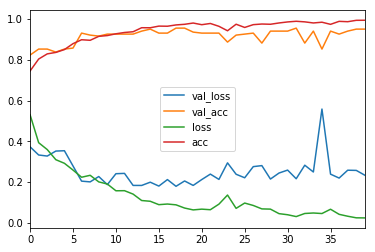

In [136]:
pd.DataFrame(history_v1.history).plot()

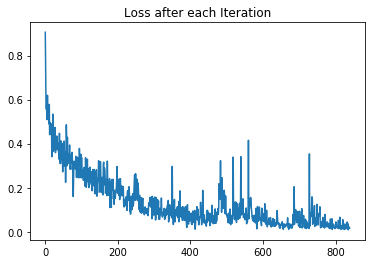

In [137]:
plt.plot(history.losses)
plt.title('Loss after each Iteration')

plt.show()

Text(0.5, 0, 'Epoch')

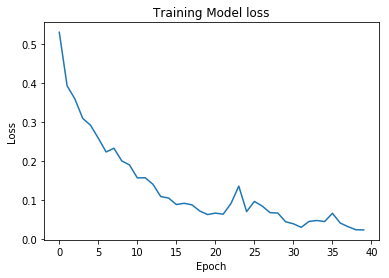

In [138]:
# plot loss curve
plt.plot(history_v1.history['loss'], label = 'training')
plt.title('Training Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

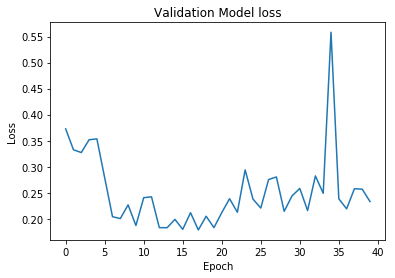

In [139]:
plt.plot(history_v1.history['val_loss'], label = 'test')
plt.title('Validation Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

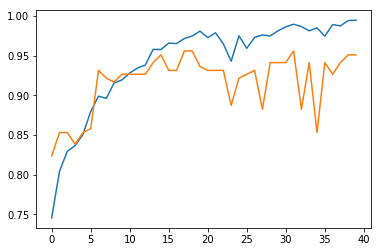

In [140]:
plt.plot(history_v1.history['acc'], label = 'training')
plt.plot(history_v1.history['val_acc'], label = 'test')

In [0]:
def get_predictions(path):
  # Runs predictions for all images in a path (Structured similar to train/test folders) and returns a dataframe with the image, y_actual, y_predicted
  # Assumes the images in the path need to be rescaled to 1/255, have a target_size = IMG_WIDTH,IMG_HEIGHT (Defined in the code)
  dummy_gen = ImageDataGenerator(rescale=1/255).flow_from_directory(
      path,
      target_size=(IMG_HEIGHT,IMG_WIDTH),
      batch_size=2000,
      shuffle=False,
      class_mode='categorical')
  img,y_actual = next(dummy_gen)

  y_actual = np.argmax(y_actual,axis=1)

  y_pred = np.argmax(model_v1.predict(img),axis=1)
#   return pd.DataFrame({'image':img,
#                       'y_actual':y_actual,
#                       'y_pred':y_pred})
  return img,y_actual,y_pred

In [142]:
IMG_HEIGHT=306
IMG_WIDTH=408
images, y_true, y_pred = get_predictions(test_ds_location)
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['LAV', 'LDL','NotDefective','Air Bubbles']
print(classification_report(y_true, y_pred, target_names=target_names))

Found 51 images belonging to 4 classes.
Confusion Matrix
[[ 4  0  2  0]
 [ 0  4  3  0]
 [ 0  0 23  0]
 [ 0  0  0 15]]
Classification Report
              precision    recall  f1-score   support

         LAV       1.00      0.67      0.80         6
         LDL       1.00      0.57      0.73         7
NotDefective       0.82      1.00      0.90        23
 Air Bubbles       1.00      1.00      1.00        15

    accuracy                           0.90        51
   macro avg       0.96      0.81      0.86        51
weighted avg       0.92      0.90      0.89        51



In [143]:
# evaluate model
_, acc = model_v1.evaluate_generator(test_data, steps=len(test_data), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

Test Accuracy: 95.098


In [144]:
IMG_HEIGHT=306
IMG_WIDTH=408
images, y_true, y_pred = get_predictions(train_ds_location)
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['LAV', 'LDL','NotDefective','Air Bubbles']
print(classification_report(y_true, y_pred, target_names=target_names))

Found 1292 images belonging to 4 classes.
Confusion Matrix
[[167   0   3   0]
 [  0 183   4   0]
 [  0   3 558   0]
 [  0   0   0 374]]
Classification Report
              precision    recall  f1-score   support

         LAV       1.00      0.98      0.99       170
         LDL       0.98      0.98      0.98       187
NotDefective       0.99      0.99      0.99       561
 Air Bubbles       1.00      1.00      1.00       374

    accuracy                           0.99      1292
   macro avg       0.99      0.99      0.99      1292
weighted avg       0.99      0.99      0.99      1292

